In [15]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# [Speed, Agility, Draft]
dataset=[[2.50, 6.00, 'No'],
        [3.75, 8.00, 'No'],
        [2.25, 5.50, 'No'],
        [3.25, 8.25, 'No'],
        [2.75, 7.50, 'No'],
        [4.50, 5.00, 'No'],
        [3.50, 5.25, 'No'],
        [3.00, 3.25, 'No'],
        [4.00, 4.00, 'No'],
        [4.25, 3.75, 'No'],
        [2.00, 2.00, 'No'],
        [5.00, 2.50, 'No'],
        [8.25, 8.50, 'No'],
        [5.75, 8.75, 'Yes'],
        [4.75, 6.25, 'Yes'],
        [5.50, 6.75, 'Yes'],
        [5.25, 9.50, 'Yes'],
        [7.00, 4.25, 'Yes'],
        [7.50, 8.00, 'Yes'],
        [7.25, 5.75, 'Yes']]

testset = [[6.75,3],[5.34,6.0],[4.67,8.4],[7.0,7.0],[7.8,5.4]]

In [16]:
# 유클리드 거리 함수

def euclidean_distance(row1,row2):
    distance = 0
    for i in range(len(row1)-1):
        distance += (row1[i]-row2[i])**2
    return distance**0.5

In [17]:
# 3-Nearest neighbor, 유클리드 거리 함수 사용버전

def _3NN_Euclidean(train,test_row):
    distances = list()
    for train_row in train:
        dist = euclidean_distance(train_row,test_row)
        distances.append((train_row,dist))
    distances.sort(key=lambda tup :tup[1])
    neighbors = list()
    for i in range(3):
        neighbors.append(distances[i][0])
    return neighbors
        

In [18]:
# _3NN_Euclidean 예측 함수

def predict_classification_3NN_Euclidean(train, test_row):
    neighbors = _3NN_Euclidean(train, test_row)
    for neighbor in neighbors:
        print(neighbor)
    output_values = list()
    for row in neighbors:
        output_values.append(row[2])
    prediction = max(set(output_values), key=output_values.count) # output_values에 있는 값의 수가 많은 것을 prediction에 넣는다.
    return prediction

In [19]:
list_in = list()

for test_row in range(len(testset)):
    prediction = predict_classification_3NN_Euclidean(dataset, testset[test_row])
    print('Expected: %s' % (prediction)) 
    print(sep = " ")
    
    list_in.append(testset[test_row][0])
    list_in.append(testset[test_row][1])
    list_in.append(str(prediction))
    dataset.append(list_in)
    
    list_in=list()
    

[7.0, 4.25, 'Yes']
[5.0, 2.5, 'No']
[4.25, 3.75, 'No']
Expected: No

[4.75, 6.25, 'Yes']
[5.5, 6.75, 'Yes']
[4.5, 5.0, 'No']
Expected: Yes

[3.75, 8.0, 'No']
[5.75, 8.75, 'Yes']
[5.25, 9.5, 'Yes']
Expected: Yes

[7.5, 8.0, 'Yes']
[7.25, 5.75, 'Yes']
[5.5, 6.75, 'Yes']
Expected: Yes

[7.25, 5.75, 'Yes']
[7.0, 4.25, 'Yes']
[7.0, 7.0, 'Yes']
Expected: Yes



In [20]:
# #  Test

# dist_list = list()
# row0 = [6.75, 3]
# for row in dataset:
#     distance = euclidean_distance(row,row0)
#     dist_list.append(distance)
#     print(distance)
# min(dist_list)

In [21]:
list_speed=list()
for i in range (len(dataset)):
    list_speed.append(dataset[i][0])
    
list_agility=list()
for i in range (len(dataset)):
    list_agility.append(dataset[i][1])
    
list_draft=list()
for i in range (len(dataset)):
    list_draft.append(dataset[i][2])
    
data={'Speed': list_speed, 'Agility': list_agility, 'Draft': list_draft}
df = pd.DataFrame(data)

In [22]:
c = df.loc[:19]

In [23]:
d=df.loc[20:24]

In [24]:
points = list()
for i in range (25):
    point_dt=(dataset[i][0],dataset[i][1])
    points.append(point_dt)
    
from scipy.spatial import Voronoi, voronoi_plot_2d

vor = Voronoi(points)


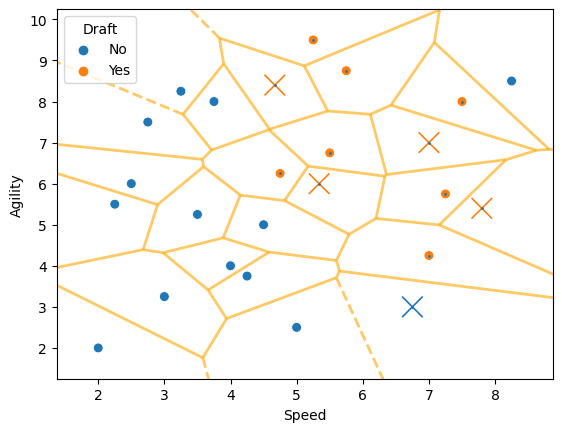

In [25]:
fig = voronoi_plot_2d(vor, show_vertices=False, line_colors='orange',line_width=2, line_alpha=0.6, point_size=2)
fig = sns.scatterplot(data = c, x='Speed', y='Agility', hue='Draft', s=50)
fig = sns.scatterplot(data = d, x='Speed', y='Agility', hue='Draft',marker='x', s=220, legend=False)
plt.show()